In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data

Text(0, 0.5, 'Feature 2')

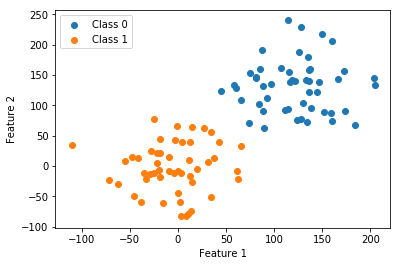

In [3]:
%matplotlib inline
np.random.seed(42)

input_dim = 2
n_samples = 100

mean = 0
std = 256 // 6

data = np.random.normal(mean, std,  size=(n_samples, input_dim))
data[n_samples // 2:, :] += 3 * std
data = data.astype(np.int64)

labels = np.zeros(n_samples)
labels[:n_samples // 2] = 1

for label in np.unique(labels):
    plt.scatter(data[labels==label, 0], data[labels==label, 1], label='Class %d' % label)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Model
A simple perceptron unit with weights and biases. All values are uint8.

In [56]:
class Perceptron:    
    def __init__(self, input_dim, learning_rate=0.1, dtype=np.uint8):
        self.W = np.zeros(input_dim).astype(dtype)
        self.b = 0
        self.lr = learning_rate
        self.dtype = dtype
        
        self.error_history = []
        self.preactivation_history = []
        self.activation_history = []

    def threshold(self, x):
        return (x > 0).astype(int)
        
    def predict(self, X, is_training=False):
        z = X.dot(self.W.T) + self.b    
        a = self.threshold(z) 
        
        if is_training:
            self.preactivation_history.append(z)
            self.activation_history.append(a)
        
        return a
    
    def errors(self, y, y_hat):  
        errors = y - y_hat
        error_rate = np.mean(np.abs(errors))
        
        return errors, error_rate
    
    def fit(self, X, y, n_iters=100):
        self.error_history = []
        self.preactivation_history = []
        self.activation_history = []
        
        for epoch in range(n_iters):
            self.step(X, y)
    
    def step(self, X, y):
        y_hat = self.predict(X, is_training=True)        
        errors, error_rate = self.errors(y, y_hat)

        dW = (errors.reshape(-1, 1) * data).mean(axis=0)
        db = errors.mean()
        
        self.W = (self.W + self.lr * dW).astype(self.dtype)
        self.b = (self.b + self.lr * db).astype(self.dtype)
        
        self.error_history.append(error_rate)
        
        return error_rate
    
    def plot_decision_boundary(self, x_lim=None, y_lim=None):   
        a = -self.W[0] / self.W[1]
        x = np.linspace(x_lim[0], x_lim[1])
        y = a * x - self.b / self.W[1]
        plt.plot(x, y, 'k-', label='Decision Boundary', alpha=0.5)
        
        if x_lim:
            plt.xlim(x_lim)
            
        if y_lim:
            plt.ylim(y_lim)            
            
    def show_results(self, X, y):
        pred = self.predict(X)
        pred = pred
        _, error_rate = self.errors(y, pred)

        plt.figure(figsize=(8, 16))
        n_rows = 5

        plt.subplot(n_rows, 2, 1)
        for label in np.unique(y):
            plt.scatter(X[y==label, 0], X[y==label, 1], label='Class %d' % label)

        plt.legend()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Actual Labels')

        plt.subplot(n_rows, 2, 2)
        for label in np.unique(y): 
            plt.scatter(X[pred==label, 0], X[pred==label, 1], label='Class %d' % label)

        ax = plt.gca()
        self.plot_decision_boundary(ax.get_xlim(), ax.get_ylim())

        plt.legend()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Predicted Labels (error rate = %.2f)' % error_rate)    

        plt.subplot(n_rows, 1, 2)
        plt.plot(self.error_history)
        plt.ylabel('Error Rate')
        plt.xlabel('Epoch')
        plt.title('Error Rate vs. Epoch')

        plt.subplot(n_rows, 1, 3)
        plt.plot(np.mean(self.preactivation_history, axis=1))
        plt.ylabel('Mean Preactivation Value')
        plt.xlabel('Epoch')
        plt.title('Perceptron Mean Preactivation Value vs. Epoch')

        plt.subplot(n_rows, 1, 4)
        plt.plot(np.mean(self.activation_history, axis=1))
        plt.ylabel('Mean Activation Value')
        plt.xlabel('Epoch')
        plt.title('Perceptron Mean Activation Value vs. Epoch')

        plt.subplot(n_rows, 2, 2 * n_rows - 1)
        plt.imshow(self.W.reshape(1, -1))
        plt.colorbar()
        plt.xticks(range(self.W.shape[0]))
        plt.yticks([])
        plt.xlabel('Weight')
        plt.title('Perceptron Weights')

        plt.subplot(n_rows, 2, 2 * n_rows)
        plt.imshow(self.b.reshape(-1, 1))
        plt.colorbar()
        plt.axis('off')
        plt.title('Perceptron Bias')    

        plt.tight_layout()
        plt.show()

<IPython.core.display.Javascript object>


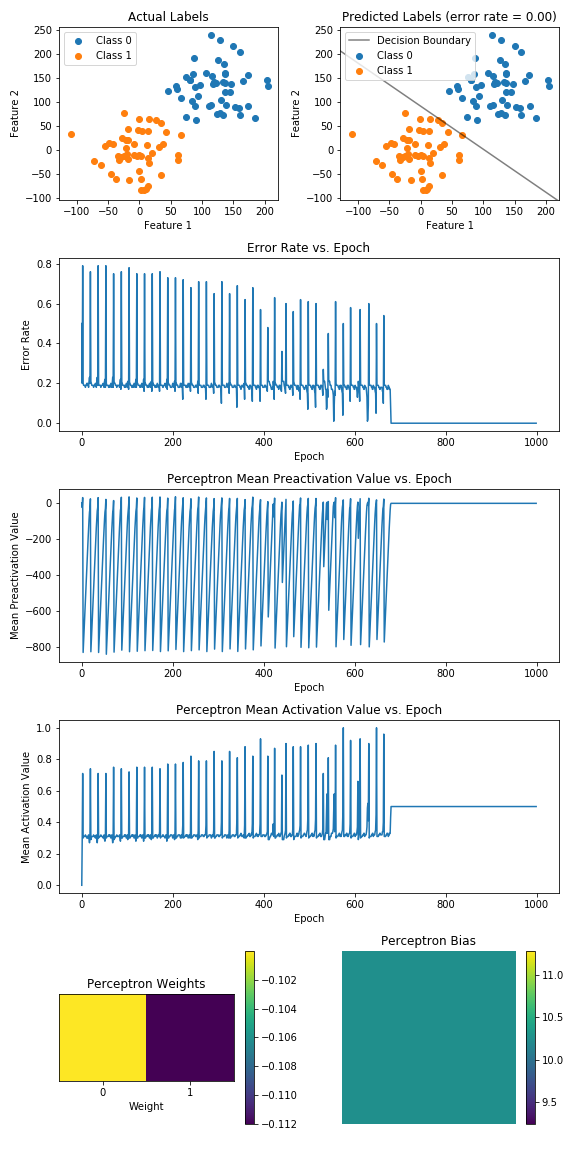

In [59]:
%matplotlib notebook 
p = Perceptron(input_dim, learning_rate=0.1, dtype=np.float32)
p.fit(data, labels, n_iters=1000)    
p.show_results(data, labels)